# k-means Clustering

Inspired by the examples [here](https://github.com/mubaris/friendly-fortnight/blob/master/kmeans-from-scratch-and-sklearn.py) and [here](https://flothesof.github.io/k-means-numpy.html). 

k-means Clustering is a method of vector quantization to partition n samples into k clusters in which each sample belongs to the cluster with the nearest mean. It is an unsupervised clustering algorithm. It is loosley related to the supervised machine learning algorith [k-nearest neighbor algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm?wprov%3Dsfti1). There is a good example (including a solid state example) for that [here](https://colab.research.google.com/github/JackieLee23/KNN-Tutorial/blob/main/KNN_tutorial.ipynb)


The algorithm is:
- Initialize $k$ clusters and $N$ points. (For us, both will be randomly assigned)
- while the positions of the clusters have moved outside of a tolerance:
   - compute the distances between all of the points and all of the clusters
   - move the centroid to the mean of the clusters associated to it


In [1]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt

## Generate random centroids and points

In [2]:
ncentroids = 8
npoints = 1000
eps = 1e-3

points = np.random.rand( npoints, 2 )
centroids = np.random.rand( ncentroids, 2 )
deltamax = 10000.

## Make an i,j grid for pairing with meshgrid

In [3]:
ii = np.arange(npoints)
jj = np.arange(ncentroids)
i,j = np.meshgrid(ii,jj)

In [4]:
print(centroids)

[[0.87440904 0.56335262]
 [0.60805877 0.98322954]
 [0.13595725 0.07087831]
 [0.7880826  0.61882138]
 [0.86119416 0.92009991]
 [0.4055147  0.98301801]
 [0.49680325 0.11904498]
 [0.85091828 0.420165  ]]


## Plot initial configuration

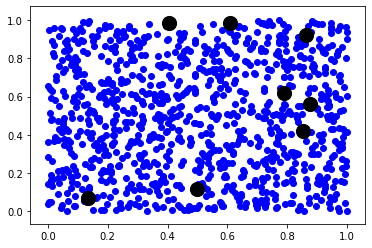

In [5]:
plt.scatter( points[:,0], points[:,1], c = 'b')
plt.scatter( centroids[:,0], centroids[:,1], c='k', marker="o", s=200)

## Minimize the distance between the mean of the points, and the centroids

In [6]:
while deltamax > eps: 
    print("iterating: ", deltamax  ) 
    old_centroids = copy.copy(centroids)
    deltavals = np.sqrt(( points[i] - centroids[j] )**2)
    distances = np.linalg.norm( deltavals, axis=2 )
    closest_centroid = np.argmin(distances, axis=0)
    centroids = np.array([points[closest_centroid==k].mean(axis=0) for k in range(centroids.shape[0])])
    deltamax = np.max( old_centroids - centroids)

iterating:  10000.0
iterating:  0.20569300013543257
iterating:  0.06680890356333313
iterating:  0.0496201701560155
iterating:  0.042929754968427936
iterating:  0.022864922971887358
iterating:  0.012526354758903124
iterating:  0.013174000807885666
iterating:  0.008728013235238752
iterating:  0.006466300516228263
iterating:  0.004313241707939508
iterating:  0.003966368456179814
iterating:  0.004350072109254366
iterating:  0.005114255644346921
iterating:  0.003598602969552722
iterating:  0.007173011588210487
iterating:  0.011410966312007498
iterating:  0.005871390434134871
iterating:  0.0019537681674973717
iterating:  0.0021512740292747023
iterating:  0.0016024360282872463
iterating:  0.0014776313336345437
iterating:  0.0031065845395115144
iterating:  0.0028746478011714705
iterating:  0.004942481224178841
iterating:  0.0013503763199712582


## Plot results

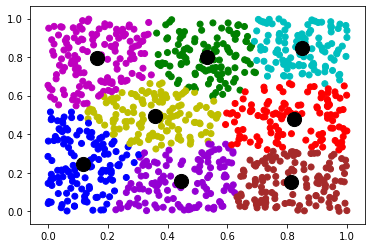

In [7]:
colors = np.array(['r', 'g', 'b', 'y', 'c', 'm', 'darkviolet', 'brown'])
plt.scatter( points[:,0], points[:,1], c = colors[closest_centroid])
plt.scatter( centroids[:,0], centroids[:,1], c = 'k', s=200, marker='o')


In [8]:
print(centroids)

[[0.82114513 0.48132565]
 [0.53291415 0.80016506]
 [0.1164094  0.24604702]
 [0.35743827 0.496413  ]
 [0.84841575 0.84867451]
 [0.16289867 0.79291588]
 [0.44434233 0.15487181]
 [0.8122933  0.14938452]]
